In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [ ]:
df = pd.read_csv('/content/Alcohol_Sales-1.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [ ]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

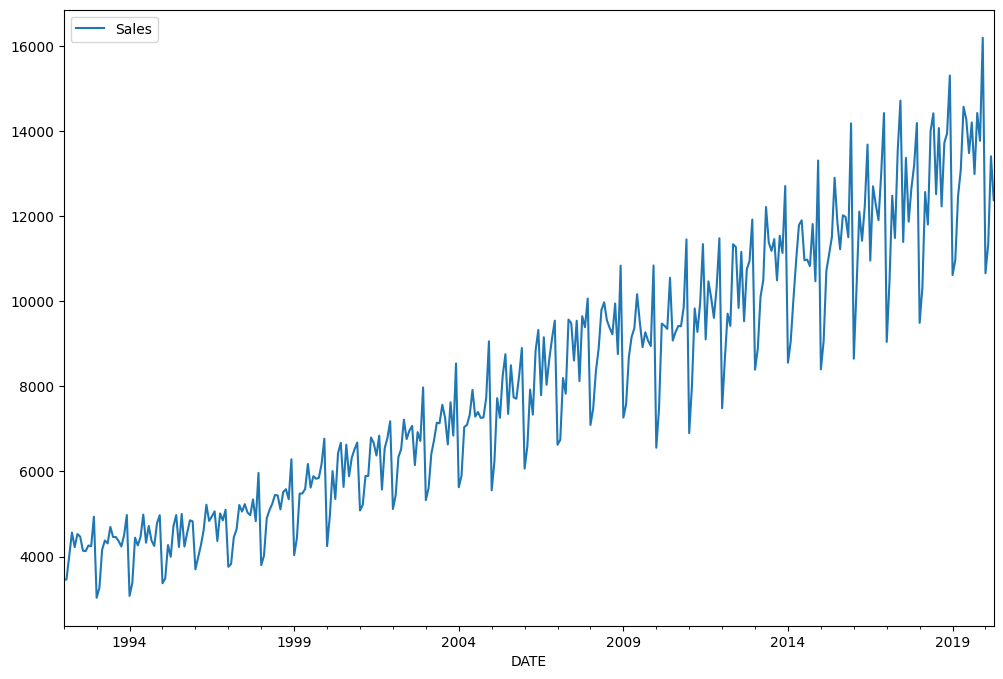

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='DATE'>

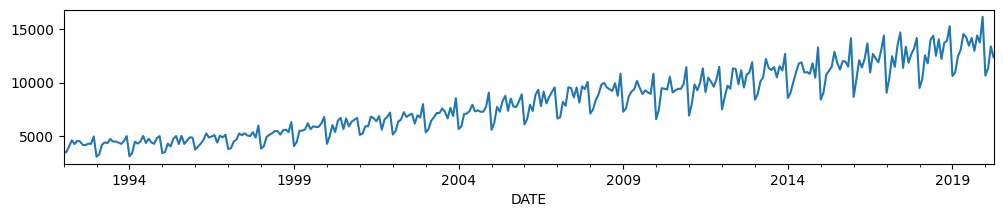

In [ ]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

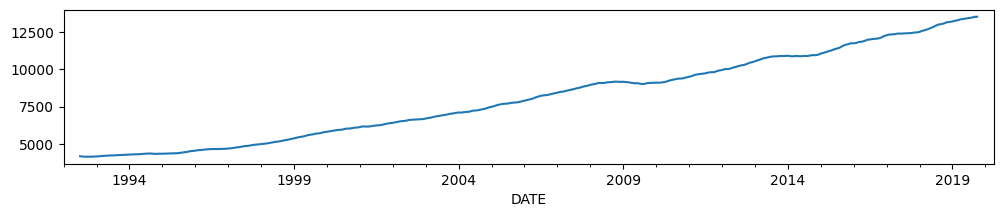

In [ ]:
results.trend.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

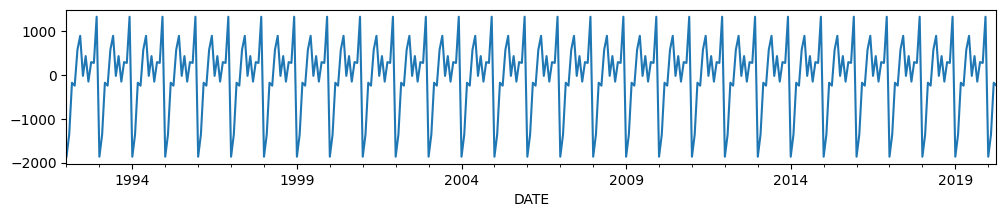

In [ ]:
results.seasonal.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

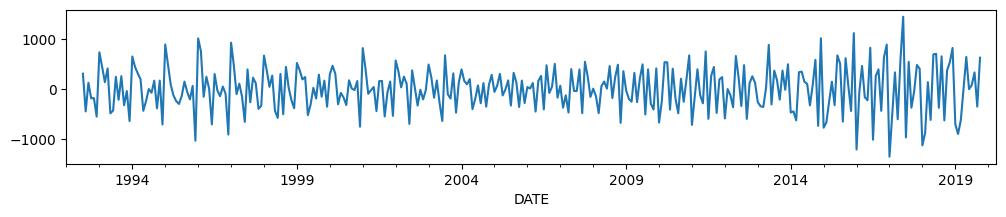

In [ ]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [ ]:
len(df)

340

In [ ]:
325-12

313

In [ ]:
train = df.iloc[:313]
test = df.iloc[313:]

In [ ]:
len(test)

27

## Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [ ]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(scaled_train)

313

In [ ]:
len(generator) # n_input = 2

311

In [ ]:
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03662502 0.03653945]
Predict this y: 
 [[0.08309088]]


In [ ]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03662502 0.03653945 0.08309088 0.13118261 0.10183125 0.12818757
 0.12279651 0.09464316 0.09370187 0.10508301 0.10345713 0.16301557]
Predict this y: 
 [[0.]]


### Create the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
# fit model
model.fit(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0266
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0087
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0096
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0066
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0073
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0042
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0043
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0048
Epoch 9/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0028
Epoch 10/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0025
Epoch 11/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028
Epoch 12/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0032
Epoch 13/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0019
Epoch 14/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0023
Epoch 15/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.00

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

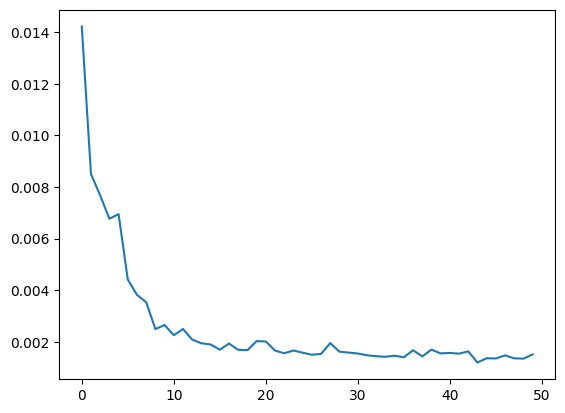

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.63511895],
       [0.80865993],
       [0.72377203],
       [0.89902447],
       [1.        ],
       [0.71572822],
       [0.88499059],
       [0.75646072],
       [0.82423413],
       [0.87035769],
       [0.95498888],
       [0.55296937]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


array([[0.6982309]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.62450796])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
current_batch.shape

(1, 12, 1)

In [ ]:
current_batch

array([[[0.63511895],
        [0.80865993],
        [0.72377203],
        [0.89902447],
        [1.        ],
        [0.71572822],
        [0.88499059],
        [0.75646072],
        [0.82423413],
        [0.87035769],
        [0.95498888],
        [0.55296937]]])

In [ ]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80865993],
        [ 0.72377203],
        [ 0.89902447],
        [ 1.        ],
        [ 0.71572822],
        [ 0.88499059],
        [ 0.75646072],
        [ 0.82423413],
        [ 0.87035769],
        [ 0.95498888],
        [ 0.55296937],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

In [ ]:
test_predictions

[array([0.6982309], dtype=float32),
 array([0.7915981], dtype=float32),
 array([0.7687094], dtype=float32),
 array([0.9155574], dtype=float32),
 array([0.9783367], dtype=float32),
 array([0.7483187], dtype=float32),
 array([0.8808313], dtype=float32),
 array([0.7551256], dtype=float32),
 array([0.831647], dtype=float32),
 array([0.8732307], dtype=float32),
 array([0.9395624], dtype=float32),
 array([0.59100115], dtype=float32),
 array([0.73156905], dtype=float32),
 array([0.7752623], dtype=float32),
 array([0.8053817], dtype=float32),
 array([0.91553897], dtype=float32),
 array([0.9589857], dtype=float32),
 array([0.7684851], dtype=float32),
 array([0.87459344], dtype=float32),
 array([0.7578082], dtype=float32),
 array([0.83690923], dtype=float32),
 array([0.8704868], dtype=float32),
 array([0.92411965], dtype=float32),
 array([0.6244232], dtype=float32),
 array([0.74630624], dtype=float32),
 array([0.76757216], dtype=float32),
 array([0.83036166], dtype=float32)]

In [ ]:
scaled_test

array([[0.62450796],
       [0.81619031],
       [0.75081294],
       [0.9396714 ],
       [0.97458497],
       [0.81182612],
       [0.94489132],
       [0.78726681],
       [0.91528324],
       [0.93428034],
       [1.05057334],
       [0.64906726],
       [0.67987335],
       [0.80788978],
       [0.86145816],
       [0.98767756],
       [0.96234811],
       [0.89448913],
       [0.95618689],
       [0.85238747],
       [0.97518398],
       [0.91921958],
       [1.12664727],
       [0.65274688],
       [0.71187746],
       [0.88815677],
       [0.79984597]])

## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[11190.52655709],
       [12281.61518145],
       [12014.13829565],
       [13730.20359516],
       [14463.84258103],
       [11775.8520031 ],
       [13324.39458597],
       [11855.3975538 ],
       [12749.6265949 ],
       [13235.57391024],
       [14010.72597635],
       [ 9937.43947387],
       [11580.11593866],
       [12090.71519339],
       [12442.69072497],
       [13729.98836434],
       [14237.70673013],
       [12011.51721609],
       [13251.49890149],
       [11886.74672413],
       [12811.12131464],
       [13203.50869691],
       [13830.2622453 ],
       [10328.00958359],
       [11752.33472717],
       [12000.84831476],
       [12734.60640895]])

In [ ]:
test

,Sales
DATE,
2018-02-01,10329
2018-03-01,12569
2018-04-01,11805
2018-05-01,14012
2018-06-01,14420
2018-07-01,12518
2018-08-01,14073
2018-09-01,12231
2018-10-01,13727


In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-55-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,Sales,Predictions
DATE,,
2018-02-01,10329,11190.526557
2018-03-01,12569,12281.615181
2018-04-01,11805,12014.138296
2018-05-01,14012,13730.203595
2018-06-01,14420,14463.842581
2018-07-01,12518,11775.852003
2018-08-01,14073,13324.394586
2018-09-01,12231,11855.397554
2018-10-01,13727,12749.626595


<Axes: xlabel='DATE'>

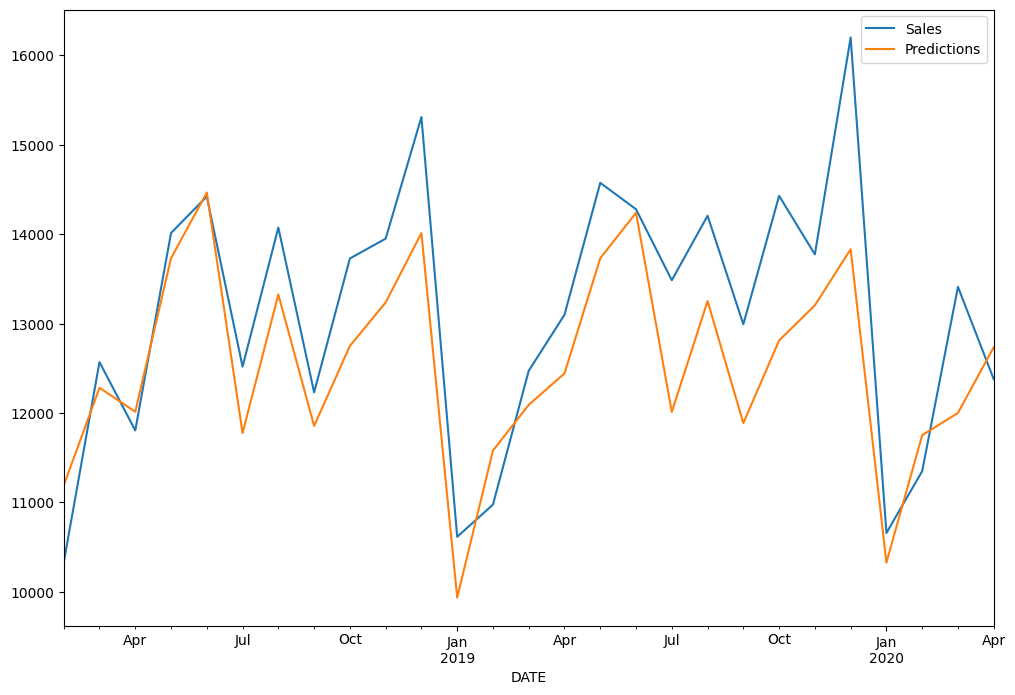

In [ ]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [ ]:
model.save('my_rnn_model.h5')

## load a model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import mse # Import mse from tensorflow.keras.losses
# Load the model
new_model = load_model('my_rnn_model.h5', custom_objects={'mse': mse})

In [ ]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,903 (159.78 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)